In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi

In [18]:
file_names = []
for composer_folder in os.listdir("Datasets/PS1"):
    tmp = []
    if not composer_folder.startswith('.'):
        composer_path = os.path.join("Datasets/PS1", composer_folder)
        
        for files in os.listdir(composer_path):
            tmp.append(os.path.join(composer_path, files))
        
        file_names.append(tmp)

1. **Note-Based Features**:

   - **Pitch Range**: Measure the span of pitches used in a composition. It can help capture the overall pitch range and register of the music.

   - **Melodic Intervals**: Calculate the distribution of melodic intervals (differences in pitch between consecutive notes). It reflects melodic 
   patterns and contour.
   
   - **Note Densities**: Determine the average number of notes per unit of time. It indicates the level of musical activity or density.

2. **Timing and Tempo Features**:

   - **Inter-Onset Intervals**: Calculate the time differences between consecutive note onsets. It represents the rhythmic patterns and tempo fluctuations.

3. **Melodic and Rhythmic Patterns**:

   - **N-grams**: Extract melodic or rhythmic patterns using n-grams. They represent recurring sequences of notes or rhythms.

   - **Motif Analysis**: Identify specific motifs or musical themes within the composition. It captures distinctive melodic or rhythmic patterns associated with a composer's style.

4. **Structural Features**:

   - **Section Analysis**: Divide the composition into sections (e.g., intro, verse, chorus) and analyze their durations, patterns, or transitions.
   
   - **Repetition Analysis**: Identify repeated musical sections or patterns. It captures structural and compositional elements.

In [36]:
midi_data = pretty_midi.PrettyMIDI(file_names[1][9])

# 1. Note-Based Features

- **Pitch**: Is a collection of pitches of it's coresponding notes.

- **Pitch Range**: Measure the span of pitches used in a composition. It can help capture the overall pitch range and register of the music.

- **Melodic Intervals**: Calculate the distribution of melodic intervals (differences in pitch between consecutive notes). It reflects melodic 
   patterns and contour.
   
- **Note Densities**: Determine the average number of notes per unit of time. It indicates the level of musical activity or density.

## 1.1 Pitch

In [37]:
def extract_pitch(midi_data):
    # Initalizing lists 
    pitches = []
    
    # Extracting pitch, velocity and note duration features
    for instrument in midi_data.instruments:
        
        # Loop through each note and add to the lists 
        for note in instrument.notes:
            pitches.append(note.pitch)
    
    return np.array(pitches)

In [44]:
pitches = extract_pitch(midi_data)
pitches

array([81, 85, 86, ..., 76, 73, 69])

## 1.2 Pitch Range

 Measure the span of pitches used in a composition. It can help capture the overall pitch range and register of the music.

In [39]:
def extract_pitch_range(pitch_array):
    return np.max(pitch_array) - np.min(pitch_array)

In [46]:
extract_pitch_range(pitches)

67

## 1.3 Melodic Intervals 

Calculate the distribution of melodic intervals (differences in pitch between consecutive notes). It reflects melodic patterns and contour.

In [91]:
def extract_melodic_intervals(pitch_array):
    intervals = []
    
    for note1, note2 in zip(pitch_array[:-1], pitch_array[1:]):
        interval = note2 - note1
        intervals.append(interval)
    
    return np.array(intervals)

In [85]:
def visualize_melodic_intervals(intervals):
    # Plot histogram of melodic intervals
    plt.hist(intervals, bins='auto', alpha=0.7)
    plt.xlabel('Melodic Interval')
    plt.ylabel('Count')
    plt.title('Distribution of Melodic Intervals')
    plt.grid(True)
    plt.show()

Size of Melodic Intervals Array:  [ 4  1  2 -7  2  2  1 -8  2  1]


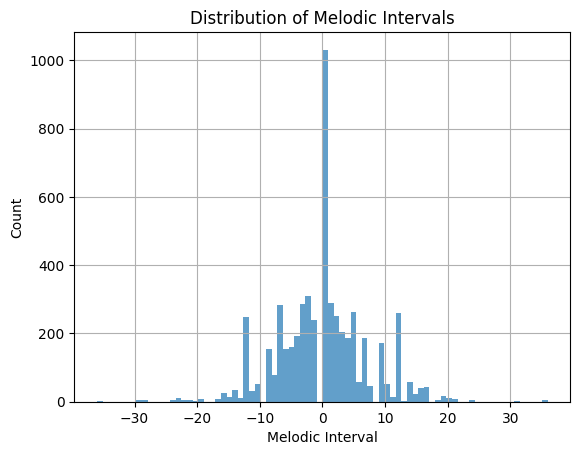

In [133]:
# Extract melodic intervals
mi = extract_melodic_intervals(pitches)

print("Size of Melodic Intervals Array: ",mi[0:10])

# Visualize melodic intervals
visualize_melodic_intervals(mi)

## 1.4 Note Densities

Determine the average number of notes per unit of time. It indicates the label of musical activity or density

In [157]:
def extract_note_densities(midi_data):
    time_window = 2.0  # Time window in seconds
    note_densities = []
    current_time = 0.0
    
    while current_time < midi_data.get_end_time():
        notes_in_window = []
        
        for instrument in midi_data.instruments:
            notes_in_window.extend(instrument.notes)
        
        notes_in_window = [note for note in notes_in_window if note.start >= current_time and note.start < current_time + time_window]
        note_density = len(notes_in_window) / time_window
        note_densities.append(note_density)
        current_time += time_window
    
    return np.array(note_densities)

In [158]:
# Print the note density
print("Note Density:", extract_note_densities(midi_data))


Note Density: [ 1.  36.5 18.5 28.5 32.5 29.5 28.5 26.  16.5 34.  40.5 32.5 32.5 16.5
 24.5 23.5 18.5 26.  25.  21.  20.5 25.  20.5 25.5 22.  30.5 17.5 29.
 41.  35.5 31.5 20.  21.  27.5 17.5 27.  23.  23.  20.5 22.  23.5 26.5
 22.  30.  13.  32.5 38.5 36.5 29.  15.5  7.  13.5 12.   8.  16.5  9.
 13.5 13.   6.5 14.  13.   8.  10.   9.   7.   6.  13.  12.  17.5 24.
 24.   8.   8.  14.  54.  18.  20.  26.   8.  10.   9.   7.   6.  13.
  9.5 13.  24.  24.  15.   6.  12.  52.  22.  17.5 28.5 32.  21.  25.
 35.  29.5 25.  33.  15.  29.  41.  35.  30.5 19.5 21.5 27.5 17.5 27.
 21.  25.  20.5 22.  21.5 28.5 22.  30.  13.  30.  41.  36.5 26.5 18. ]


# 2. Timing and Temp Features

   - **Inter-Onset Intervals**: Calculate the time differences between consecutive note onsets. It represents the rhythmic patterns and tempo fluctuations.
   

## 2.1 Inter-Onset Intervals

 Calculate the time differences between consecutive note onsets. It represents the rhythmic patterns and tempo fluctuations.

In [134]:
def extract_inter_onset_intervals(midi_data):
    iois = []
    prev_onset = 0
    
    for instrument in midi_data.instruments:
        
        sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
        
        for note in sorted_notes:
            ioi = note.start - prev_onset
            iois.append(ioi)
            prev_onset = note.start
    
    return np.array(iois)
            

Inter Onset Intervals:   -248.97823573333335


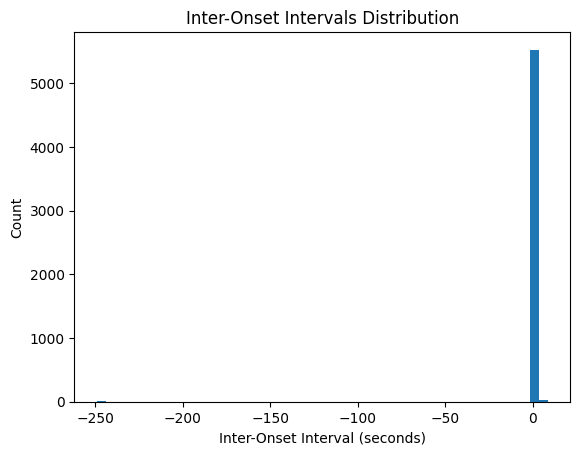

In [135]:
npiois = extract_inter_onset_intervals(midi_data)
print("Inter Onset Intervals:  ", np.min(npiois))

# Visualize inter-onset intervals
plt.hist(npiois, bins=50)
plt.xlabel('Inter-Onset Interval (seconds)')
plt.ylabel('Count')
plt.title('Inter-Onset Intervals Distribution')
plt.show()

# 3. Melodic and Rhythmic Patterns:

   - **N-grams**: Extract melodic or rhythmic patterns using n-grams. They represent recurring sequences of notes or rhythms.

## 3.1 N-grams

Extract melodic or rhythmic patterns using n-grams. They represent recurring sequences of notes or rhythms.


In [152]:
from nltk import ngrams

def extract_ngrams(pitch_array):
    # Consecutive notes to consider for n-grams
    n = 4
    
    # Create n-grams
    note_ngrams = np.array(list(ngrams(pitch_array, n)))
    
    #Flatten it into a single dimension
    note_ngrams_flattened = note_ngrams.flatten()
    
    return note_ngrams_flattened

Note N-grams:  5
N-gram:  [81 85 86 ... 76 73 69]


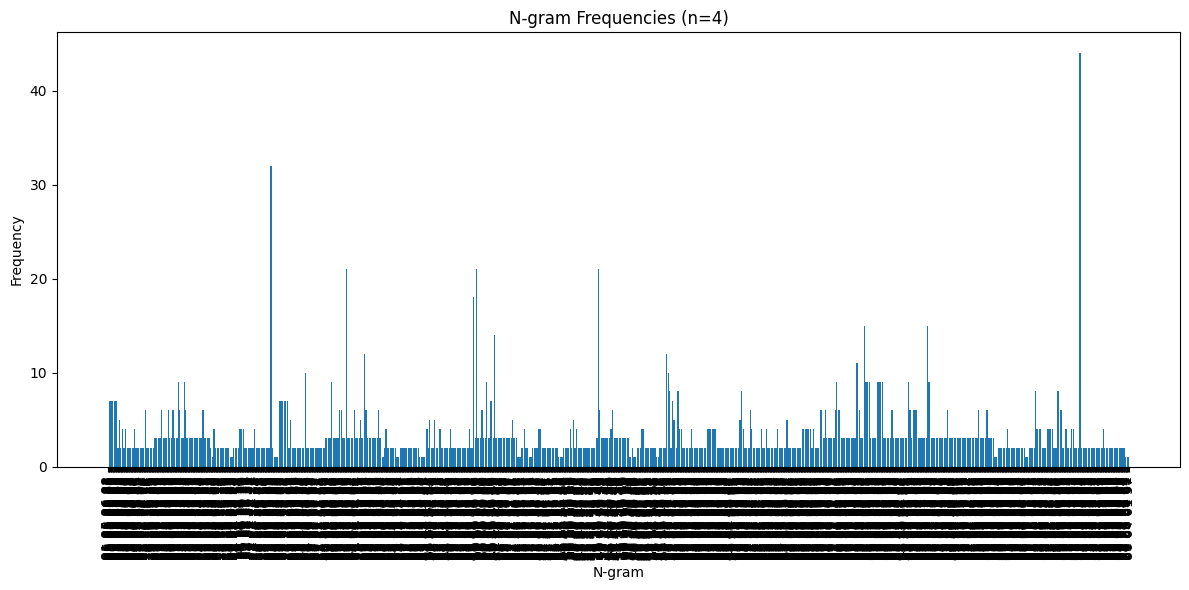

In [166]:

# Define the number of consecutive notes to consider for n-grams
n = 4

# Extract notes from the MIDI file
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append(note.pitch)

# Create n-grams
note_ngrams = np.array(list(ngrams(notes, n)))

# Count the occurrence of each n-gram
ngram_counts = {}
for ngram in note_ngrams:
    ngram = tuple(ngram)
    if ngram in ngram_counts:
        ngram_counts[ngram] += 1
    else:
        ngram_counts[ngram] = 1

print("Note N-grams: ", ngram_counts[(81, 85, 86, 88)])

# for ng in ngram_counts:
#     print(ng)
    
print("N-gram: ", extract_ngrams(pitches))

# Visualize the n-gram counts
ngram_labels = [' '.join(map(str, ngram)) for ngram in ngram_counts.keys()]
ngram_values = list(ngram_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(ngram_labels, ngram_values)
plt.xticks(rotation=90)
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title(f'N-gram Frequencies (n={n})')
plt.tight_layout()
plt.show()